In [1]:
import torch
from datasets import load_dataset
from transformers import T5ForConditionalGeneration, T5Tokenizer, TrainingArguments, Trainer

train_dataset = load_dataset("wmt16", "de-en", split="train[:50000]")
validation_dataset = load_dataset("wmt16", "de-en", split="validation")
test_dataset = load_dataset("wmt16", "de-en", split="test")

/home/iiitd/miniconda3/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import AutoTokenizer

checkpoint = "google-t5/t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [3]:
source_lang = "de"
target_lang = "en"
prefix = "translate German to English: "


def preprocess_data(examples):
    inputs = [prefix + example[source_lang] for example in examples["translation"]]
    targets = [example[target_lang] for example in examples["translation"]]
    model_inputs = tokenizer(inputs, text_target=targets, max_length=128, truncation=True)
    return model_inputs

train_dataset = train_dataset.map(preprocess_data, batched=True)
validation_dataset = validation_dataset.map(preprocess_data, batched=True)
test_dataset = test_dataset.map(preprocess_data, batched=True)

In [4]:
from transformers import DataCollatorForSeq2Seq
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)


In [5]:

training_args = Seq2SeqTrainingArguments(
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    num_train_epochs=2,
    logging_dir="./logs",
    logging_steps=100,
    save_strategy="epoch",
    save_steps=500,
    output_dir="./checkpoints",
    overwrite_output_dir=True,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

/home/iiitd/miniconda3/envs/nlp/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
  3%|▎         | 100/3126 [06:53<3:31:31,  4.19s/it]

{'loss': 2.652, 'grad_norm': 1.7001361846923828, 'learning_rate': 0.00019360204734484966, 'epoch': 0.06}


  6%|▋         | 200/3126 [13:47<3:28:51,  4.28s/it]

{'loss': 2.4313, 'grad_norm': 1.1839457750320435, 'learning_rate': 0.0001872040946896993, 'epoch': 0.13}


 10%|▉         | 300/3126 [20:31<3:07:09,  3.97s/it]

{'loss': 2.3561, 'grad_norm': 1.2356849908828735, 'learning_rate': 0.00018080614203454896, 'epoch': 0.19}


 13%|█▎        | 400/3126 [27:33<3:03:20,  4.04s/it]

{'loss': 2.296, 'grad_norm': 1.1784800291061401, 'learning_rate': 0.0001744081893793986, 'epoch': 0.26}


 16%|█▌        | 500/3126 [34:34<3:04:15,  4.21s/it]

{'loss': 2.2297, 'grad_norm': 1.2061876058578491, 'learning_rate': 0.00016801023672424826, 'epoch': 0.32}


 19%|█▉        | 600/3126 [41:29<2:53:57,  4.13s/it]

{'loss': 2.2327, 'grad_norm': 1.248857855796814, 'learning_rate': 0.00016161228406909789, 'epoch': 0.38}


 22%|██▏       | 700/3126 [48:25<3:02:01,  4.50s/it]

{'loss': 2.1962, 'grad_norm': 1.2644782066345215, 'learning_rate': 0.00015521433141394754, 'epoch': 0.45}


 26%|██▌       | 800/3126 [55:19<2:34:21,  3.98s/it]

{'loss': 2.2036, 'grad_norm': 3.2697696685791016, 'learning_rate': 0.0001488163787587972, 'epoch': 0.51}


 29%|██▉       | 900/3126 [1:01:57<2:27:43,  3.98s/it]

{'loss': 2.1499, 'grad_norm': 1.1618826389312744, 'learning_rate': 0.00014241842610364684, 'epoch': 0.58}


 32%|███▏      | 1000/3126 [1:09:09<2:44:13,  4.63s/it]

{'loss': 2.1495, 'grad_norm': 1.3441615104675293, 'learning_rate': 0.0001360204734484965, 'epoch': 0.64}


 35%|███▌      | 1100/3126 [1:16:11<2:29:31,  4.43s/it]

{'loss': 2.1442, 'grad_norm': 1.1624736785888672, 'learning_rate': 0.00012962252079334614, 'epoch': 0.7}


 38%|███▊      | 1200/3126 [1:23:17<2:13:02,  4.14s/it]

{'loss': 2.1537, 'grad_norm': 1.1087135076522827, 'learning_rate': 0.0001232245681381958, 'epoch': 0.77}


 42%|████▏     | 1300/3126 [1:30:18<2:22:52,  4.69s/it]

{'loss': 2.1227, 'grad_norm': 1.2346217632293701, 'learning_rate': 0.00011682661548304543, 'epoch': 0.83}


 45%|████▍     | 1400/3126 [1:37:12<2:14:15,  4.67s/it]

{'loss': 2.1065, 'grad_norm': 1.1398156881332397, 'learning_rate': 0.00011042866282789508, 'epoch': 0.9}


 48%|████▊     | 1500/3126 [1:44:23<2:01:43,  4.49s/it]

{'loss': 2.0838, 'grad_norm': 0.9996979832649231, 'learning_rate': 0.00010403071017274473, 'epoch': 0.96}


                                                       
 50%|█████     | 1563/3126 [1:49:48<1:26:21,  3.32s/it]

{'eval_loss': 2.004470109939575, 'eval_runtime': 56.7825, 'eval_samples_per_second': 38.198, 'eval_steps_per_second': 1.198, 'epoch': 1.0}


 51%|█████     | 1600/3126 [1:52:35<1:59:27,  4.70s/it]

{'loss': 2.0712, 'grad_norm': 1.154113531112671, 'learning_rate': 9.763275751759438e-05, 'epoch': 1.02}


 54%|█████▍    | 1700/3126 [1:59:43<1:39:15,  4.18s/it]

{'loss': 2.0158, 'grad_norm': 1.2276159524917603, 'learning_rate': 9.123480486244403e-05, 'epoch': 1.09}


 58%|█████▊    | 1800/3126 [2:08:10<2:19:23,  6.31s/it]

{'loss': 2.0267, 'grad_norm': 1.1666384935379028, 'learning_rate': 8.483685220729366e-05, 'epoch': 1.15}


 61%|██████    | 1900/3126 [2:16:00<1:48:03,  5.29s/it]

{'loss': 2.0329, 'grad_norm': 1.1709308624267578, 'learning_rate': 7.843889955214332e-05, 'epoch': 1.22}


 62%|██████▏   | 1928/3126 [2:18:04<1:38:27,  4.93s/it]

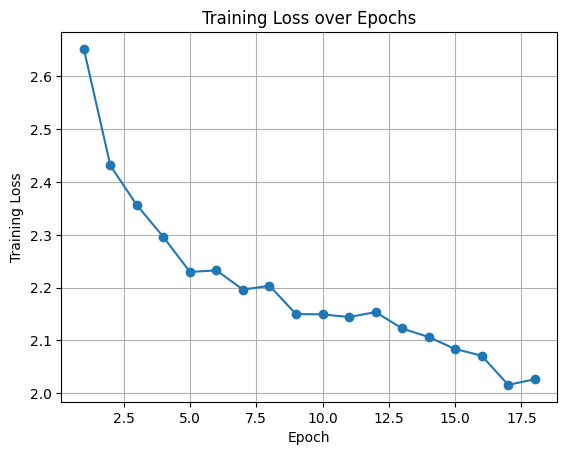

In [2]:
import matplotlib.pyplot as plt

loss_list = [2.652, 2.4313, 2.3561,2.296, 2.2297, 2.2327, 2.1962, 2.2036, 2.1499, 2.1495, 2.1442, 2.1537, 2.1227, 2.1065, 2.0838, 2.0712, 2.0158, 2.0267]
epoch_list = [i+1 for i in range(len(loss_list))]


plt.plot(epoch_list, loss_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss over Iterations')
plt.grid(True)
plt.show()
